# Libs and pre-definitions

In [1]:
DATA_PATH = r'/home/luis-felipe/Uncertainty_Estimation/data'
#CORRUPTED_DATA_PATH = os.path.join(DATA_PATH,'corrupted')

PATH_MODELS = r'/home/luis-felipe/Uncertainty_Estimation/torch_models'
PATH_trainer = r'/home/luis-felipe/Uncertainty_Estimation/torch_models/trainer'

In [2]:
N_ENSEMBLES = 3

### Bibliotecas padrões python e utils pytorch

In [3]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import os

In [4]:
# Define o computador utilizado como cuda (gpu) se existir ou cpu caso contrário
print(torch.cuda.is_available())
dev = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

True


### Bibliotecas desenvolvidas

https://github.com/lfpc/Uncertainty_Estimation

In [5]:
import NN_models as models
from NN_models import vgg
from NN_models import wide_resnet
import NN_utils as utils
import NN_utils.train_and_eval as TE
import cifar_data
from NN_models import mimo


# Train classifier

## General definitions

In [6]:
loss_criterion = nn.NLLLoss().cuda()

#risk_dict = {'selective_risk_mcp':  lambda x,label: unc_comp.selective_risk(x,label,unc_type = unc.MCP_unc)}

In [7]:
#test MIMO with and without Dropout

In [8]:
cifar_data.DataGenerator.params['train_batch_size'] = 32
cifar_data.DataGenerator.params['test_batch_size'] = 20

## CIFAR 10

In [9]:
data = cifar_data.Cifar10(data_dir = DATA_PATH)
num_classes = data.n_classes

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
for ens in range(2,6):
    model = models.VGG_16
    #model = models.Model_CNN
    model = mimo.MIMOModel(model,num_classes,ensemble_num = ens,name = f'MIMO_VGG_10_{ens}').to(dev)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1,momentum = 0.9,weight_decay = 5e-4,nesterov = True)

    model_trainer = mimo.Trainer_MIMO(model,optimizer,loss_criterion,None, data.test_dataloader,update_lr = (50,5))
    model_trainer.fit(data.train_dataloader,200, checkpoint = True, PATH = PATH_MODELS)

    print(f'Max acc = {max(model_trainer.val_acc)} - epoch = {np.argmax(model_trainer.val_acc)}')
    torch.save(model.state_dict(), PATH_MODELS+f'/MIMO_VGG_10_{ens}.pt')



Progress::   0%|          | 0/200 [00:00<?, ?it/s]

Max acc = 93.86 - epoch = 174


Progress::   0%|          | 0/200 [00:00<?, ?it/s]

Max acc = 94.02 - epoch = 170


Progress::   0%|          | 0/200 [00:00<?, ?it/s]

## CIFAR 100

In [ ]:
data = cifar_data.Cifar100(data_dir = DATA_PATH)
num_classes = data.n_classes

In [ ]:
for ens in range(2,6):
    model_2 = models.VGG_16
    model_2 = mimo.MIMOModel(model_2,num_classes,ensemble_num = ens,name = f'MIMO_VGG_100_{ens}').to(dev)
    optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1,momentum = 0.9,weight_decay = 5e-4,nesterov = True)

    model_trainer_2 = mimo.Trainer_MIMO(model_2,optimizer,loss_criterion,data.train_dataloader, data.test_dataloader,update_lr = (50,5))
    model_trainer_2.fit(data.train_dataloader,200, checkpoint = True, PATH = PATH_MODELS)

    print(f'Max acc = {max(model_trainer_2.val_acc)} - epoch = {np.argmax(model_trainer_2.val_acc)}')
    torch.save(model_2.state_dict(), PATH_MODELS+f'/MIMO_VGG_100_{ens}.pt')


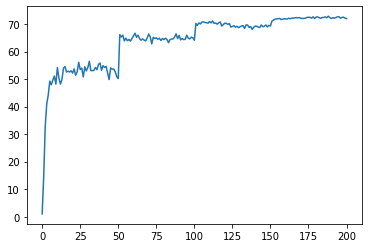

In [15]:
plt.plot(model_trainer_2.val_acc)